age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
[[34  1]
 [11 14]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60

Accuracy Score: 0.8


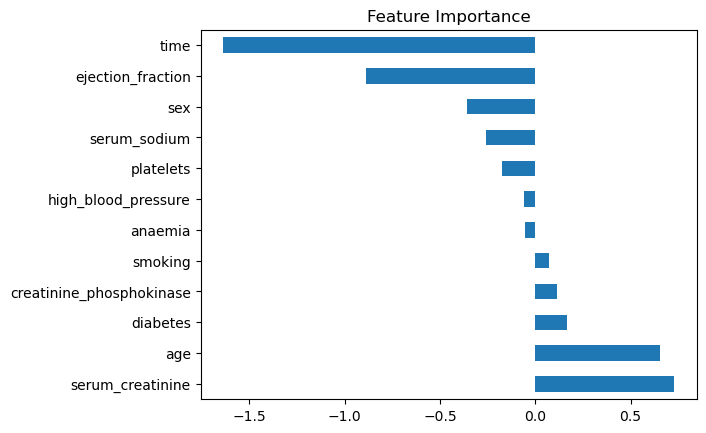

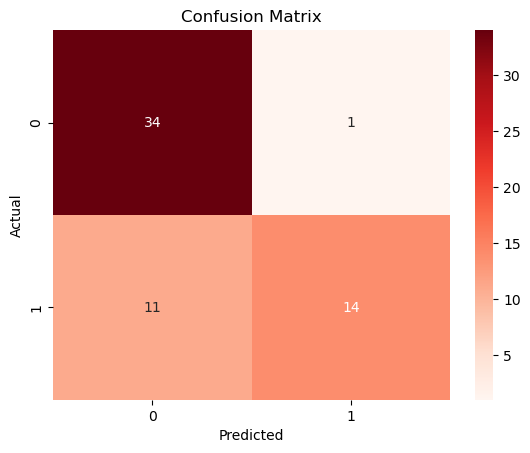

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

df = pd.read_csv("C:/Users/ABHISHEKDARSANH/Downloads/heart+failure+clinical+records/heart_failure_clinical_records_dataset.csv")

print(df.isnull().sum())

X = df.drop('DEATH_EVENT',axis=1)
y = df["DEATH_EVENT"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))

feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Reds',fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

